# Last FC layer of an image classification network

The objective of this notebook is to study the last fully-connected layer of an image classification network.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
# Magic used by the notebook to show figures inline
%matplotlib inline
# matplotlib default values
plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [0]:
import tensorflow
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model_name = "vgg"

if model_name == "vgg":
    model0 = VGG16(weights=None)
    model = VGG16(weights='imagenet')

if model_name == "dense":
    model0 = DenseNet121(weights=None)
    model = DenseNet121(weights='imagenet')

img_path = 'gdrive/My Drive/Colab Notebooks/dlia_course/practical_sessions/imagenet/418657219_3567961db1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds_0 = model0.predict(x)
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted 0:', decode_predictions(preds_0, top=3)[0])
print('Predicted:', decode_predictions(preds, top=3)[0])


Predicted 0: [('n02268853', 'damselfly', 0.0017950096), ('n02100583', 'vizsla', 0.0016637044), ('n04371774', 'swing', 0.0016613235)]
Predicted: [('n01601694', 'water_ouzel', 0.9923921), ('n02027492', 'red-backed_sandpiper', 0.004854911), ('n02028035', 'redshank', 0.0018741286)]


In [0]:

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Get the last layer of the chosen model

In [0]:
if model_name == "dense":
    pred = model.get_layer("fc1000").get_weights()[0]
    pred_0 = model0.get_layer("fc1000").get_weights()[0]

if model_name == "vgg":
    pred = model.get_layer("predictions").get_weights()[0]
    pred_0 = model0.get_layer("predictions").get_weights()[0]

shape = pred.shape
print(shape)


(4096, 1000)


# Normalize the vectors and compute the cosine similarity

In [0]:
norms = []
norms_0 = []

for neuron in range(shape[1]):
    norms_0 += [np.linalg.norm(pred_0[:,neuron])]
    norms += [np.linalg.norm(pred[:,neuron])]
norms = np.array(norms)
pred /= norms
pred_0 /= norms_0

cosine_0 = np.matmul(pred_0.transpose(), pred_0)
cosine = np.matmul(pred.transpose(), pred)

In [0]:
def cumul_dist(x, y):
    """"Compute the cumulative distribution function from set of realizations y.
    
    Arguments:
       x: points where the distribution is computed
       y: values
    """
    out = [np.sum(y < v) for v in x]
    out = out / out[-1]
    proba = [out[i+1] - out[i] for i in range(len(out)-1)]
    return out, proba


In [0]:
x = np.arange(-1, 1, 0.01)

proba_cum_0, proba_0 = cumul_dist(x, cosine_0)
proba_cum, proba = cumul_dist(x, cosine)

np.sum(proba)

1.0

# Display the distribution of cosine similarities

Compare the values of the cosine similarities of the initial model (with randomly generated weights) and of the optimized model.

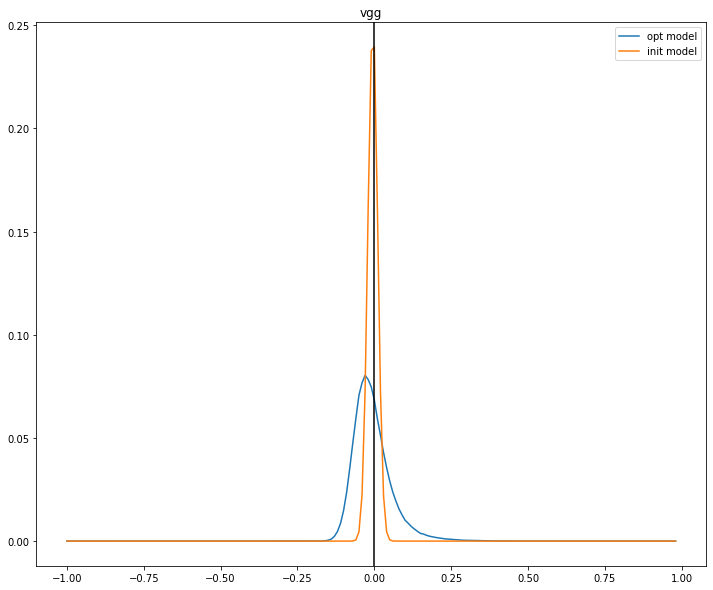

In [0]:
x1 = x[:-1]
plt.plot(x1, proba, label="opt model")
plt.plot(x1, proba_0, label="init model")
#plt.yscale('log')
plt.legend()
plt.title(model_name)
plt.axvline(0, color="black")
plt.show()


**Question**: why are the cosine similarites of the random model so close to zero?

**Answer:**

**Question**: what happens with the learnt model? Comment on the distribution of the values of its cosine similarities.

**Answer**: 

# Looking for high and low correlations

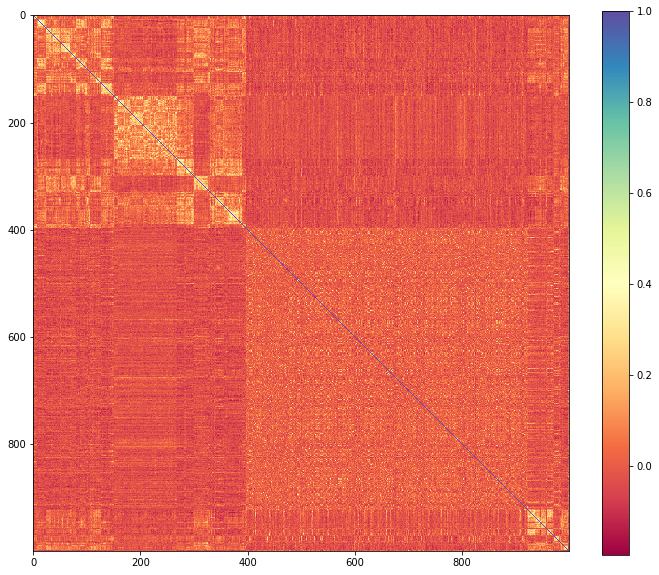

In [0]:
#plt.imshow(cosine[0:400, 0:400])
plt.imshow(cosine)
plt.set_cmap('Spectral')
plt.colorbar()


**Question**: Analyse the different regions of this plot.

The human-readable labels of the ImageNet classes are available from:

https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

**Answer**: 